# Covid-19 Prediction

### Introduction

The COVID-19 pandemic, caused by the novel coronavirus SARS-CoV-2, has had a profound impact on global health, economies, and societies. As the virus continues to spread worldwide, there is an urgent need to understand and predict its progression to effectively mitigate its impact. Predictive analysis of COVID-19 has emerged as a crucial tool in guiding public health strategies, resource allocation, and decision-making processes.

COVID-19 prediction analysis involves the use of data-driven models, statistical techniques, and machine learning algorithms to forecast various aspects of the pandemic. These predictions can encompass a wide range of factors, including the spread and transmission patterns of the virus, the number of new cases, hospitalizations, and even mortality rates. By leveraging historical data, real-time information, and advanced analytical methods, prediction models aim to provide valuable insights into the future trajectory of the pandemic.

The Need for COVID-19 Prediction Analysis:

Public Health Planning: Accurate predictions of COVID-19 transmission and case numbers are vital for public health planning and response. By forecasting the potential number of infections, healthcare systems can prepare for surges in demand, allocate resources effectively, and implement targeted intervention strategies such as testing, contact tracing, and vaccination campaigns.

Policy Making: Policymakers rely on predictive analysis to make informed decisions regarding lockdown measures, travel restrictions, social distancing guidelines, and other public health interventions. By understanding the potential impact of different policy scenarios, decision-makers can implement measures that balance the containment of the virus with the socioeconomic well-being of communities.

Resource Allocation: Predictive models play a critical role in optimizing the allocation of limited resources such as hospital beds, medical supplies, and personnel. By estimating future hospitalizations and healthcare needs, authorities can ensure that healthcare systems are adequately equipped to handle the influx of patients and provide optimal care.

Risk Assessment: Prediction analysis helps identify high-risk areas and populations vulnerable to the virus. This information enables public health agencies to prioritize resources, implement targeted interventions, and allocate testing and vaccination efforts where they are most needed.

Vaccine Development and Distribution: Predictive models aid in vaccine development and distribution strategies. They can estimate the potential impact of vaccination campaigns, evaluate the effectiveness of different vaccination strategies, and guide prioritization based on population demographics and vulnerability.

In today's world, with an aging population and the increasing burden of chronic diseases, the importance of accurate disease prediction cannot be overstated.

### Dataset Description:

A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. Please consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set. Please further divide training and validation set at a ratio of 4:1.  

The following list describes each of the dataset’s features used by the model: 


A. Basic information: 

1. ID (Individual ID)

2. Sex (male/female). 

3. Age ≥60 above years (true/false) 

4. Test date (date when tested for COVID)


B. Symptoms: 

5. Cough (true/false).

6. Fever (true/false). 

7. Sore throat (true/false). 

8. Shortness of breath (true/false). 

9. Headache (true/false). 


C. Other information: 

10. Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

11. Corona positive or negative

### Target variable:
Corona

### Aim:
Predicting COVID19​ test result based on its features.

### Import Libraries 

In [91]:
pip install category_encoders


     -------------------------------------- 81.9/81.9 kB 269.5 kB/s eta 0:00:00


In [28]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: fancyimpute in c:\users\administrator\anaconda3\lib\site-packages (0.7.0)



In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot
import missingno as msno                       # library to examine missing values
import seaborn as sns
import statsmodels.api as sm
from numpy import mean
from numpy import std

from sklearn.impute import SimpleImputer
from fancyimpute import KNN
from fancyimpute import IterativeImputer
import category_encoders as ce

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [177]:
df_covid = pd.read_csv('C:\\Users\Administrator\Downloads\Final Projects\corona_tested.csv')
df_covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [178]:
# Set the first column as the index
df_covid.set_index(['Ind_ID'], inplace=True)
df_covid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Ind_ID,,,,,,,,,,
1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278846,30-04-2020,False,False,False,False,False,negative,None,male,Other


### Getting info about dataset

In [179]:
df_covid.info() # Getting info about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278848 entries, 1 to 278848
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Test_date            278848 non-null  object
 1   Cough_symptoms       278848 non-null  object
 2   Fever                278848 non-null  object
 3   Sore_throat          278848 non-null  object
 4   Shortness_of_breath  278848 non-null  object
 5   Headache             278848 non-null  object
 6   Corona               278848 non-null  object
 7   Age_60_above         278848 non-null  object
 8   Sex                  278848 non-null  object
 9   Known_contact        278848 non-null  object
dtypes: object(10)
memory usage: 23.4+ MB


In [180]:
df_covid.drop_duplicates() # dropping duplicate observations if any

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Ind_ID,,,,,,,,,,
1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
6,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,other,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
272921,30-04-2020,False,False,False,False,False,positive,None,None,Other
276801,30-04-2020,True,True,False,False,False,negative,None,female,Contact with confirmed
276808,30-04-2020,False,False,False,False,False,negative,None,female,Contact with confirmed


**We found that there are no duplicate entries**

In [181]:
# Change reservation_status_date data type from 'object' to 'datetime'
df_covid['Test_date'] = pd.to_datetime(df_covid['Test_date'])

In [182]:
# Get unique values for each column having 'object' data type
for col in df_covid.describe(include = 'object').columns:
    print(col)
    print(df_covid[col].unique())
    print('-'*80)

Cough_symptoms
['TRUE' 'FALSE' 'None' False True]
--------------------------------------------------------------------------------
Fever
['FALSE' 'TRUE' 'None' False True]
--------------------------------------------------------------------------------
Sore_throat
['TRUE' 'FALSE' 'None' False True]
--------------------------------------------------------------------------------
Shortness_of_breath
['FALSE' 'TRUE' 'None' False True]
--------------------------------------------------------------------------------
Headache
['FALSE' 'TRUE' 'None' False True]
--------------------------------------------------------------------------------
Corona
['negative' 'positive' 'other']
--------------------------------------------------------------------------------
Age_60_above
['None' 'No' 'Yes']
--------------------------------------------------------------------------------
Sex
['None' 'male' 'female']
--------------------------------------------------------------------------------
Known_contact


### Checking for missing values

In [183]:
# Replace "None" values with NaN

for column in df_covid.columns:
    df_covid[column] = df_covid[column].replace('None', np.nan)

In [184]:
# Check for NaN values in the DataFrame
nan_values = df_covid.isnull().sum()

# missing values in percentage sorted in descending order
percent_missing = df_covid.isnull().sum() * 100 / len(df_covid)
percent_missing.sort_values(ascending = False)

Age_60_above           45.659284
Sex                     7.015650
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Test_date               0.000000
Corona                  0.000000
Known_contact           0.000000
dtype: float64

### Checking relationship between missing values

<AxesSubplot:>

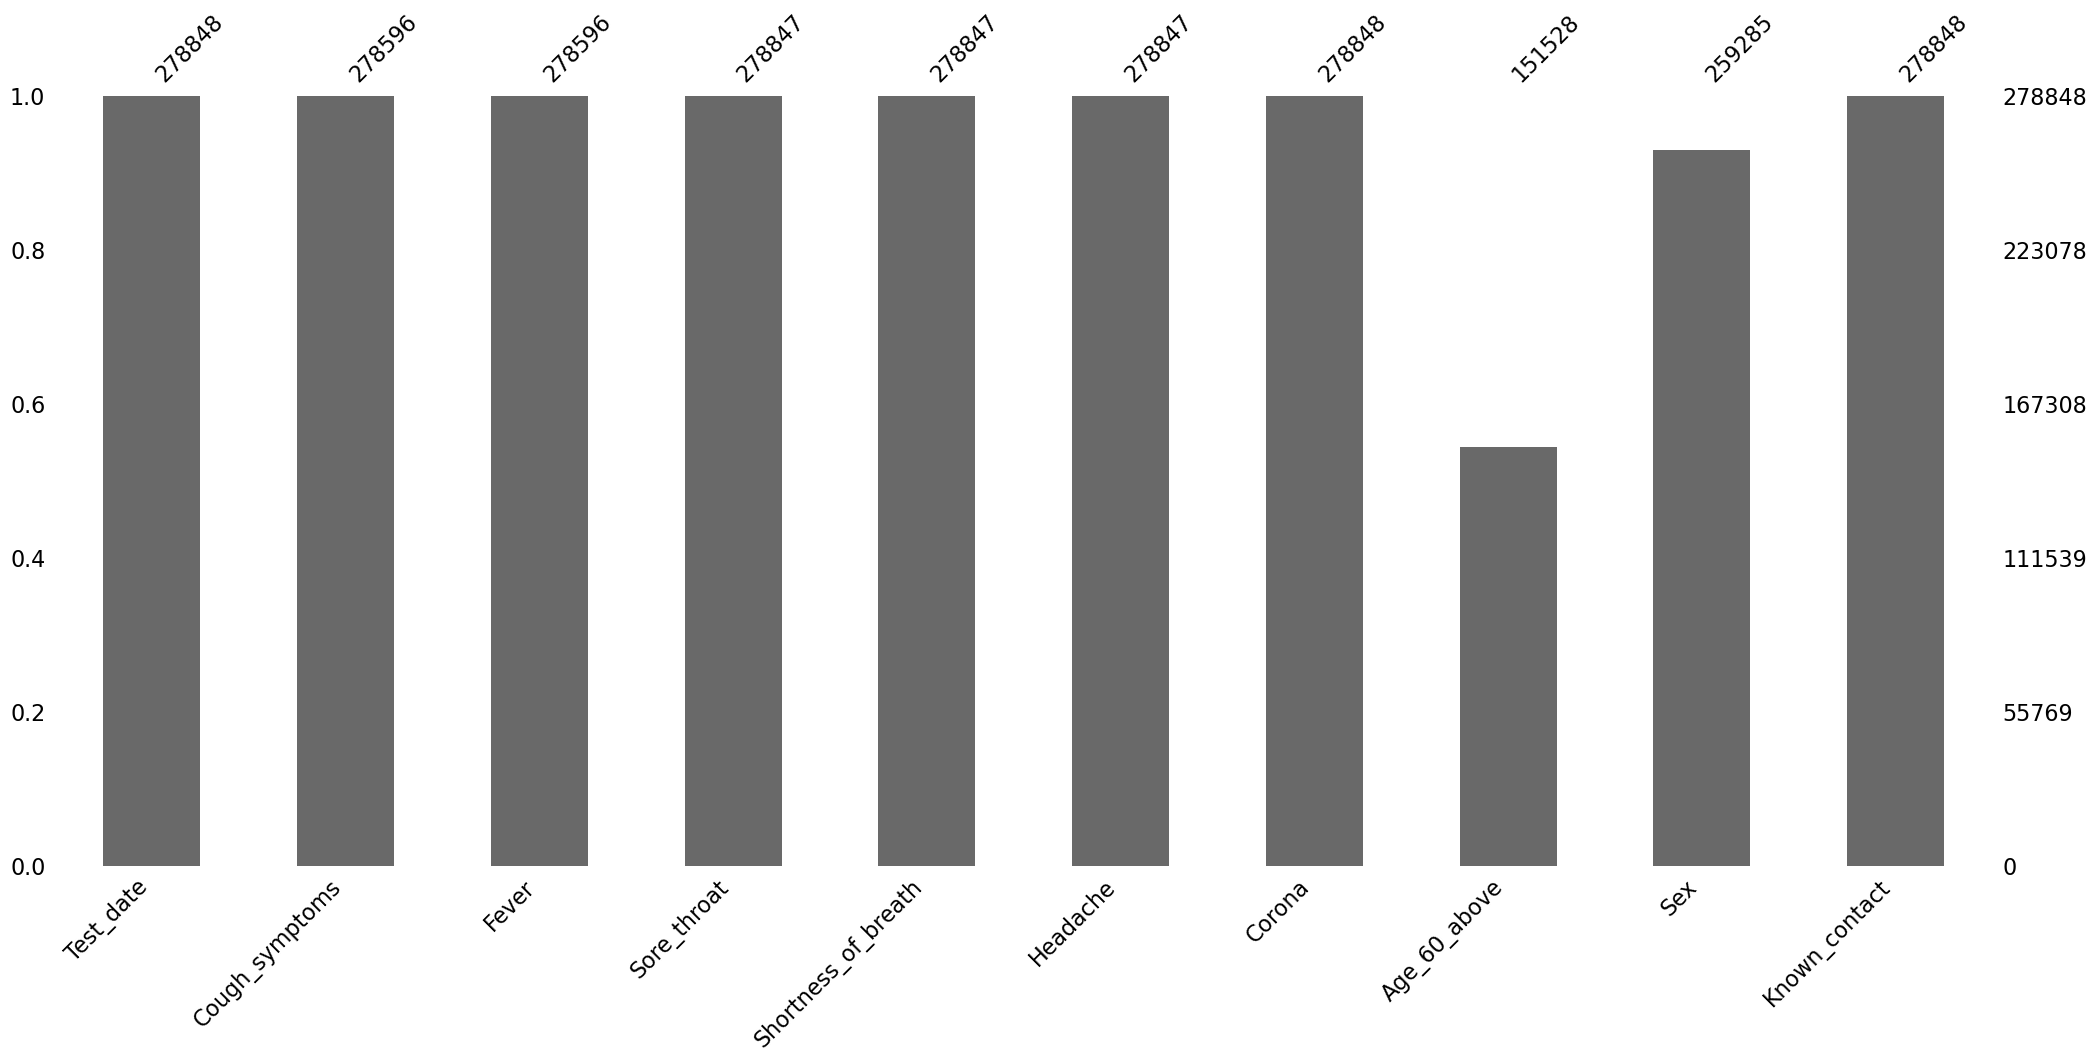

In [185]:
# creating bar plot to see the missing values
msno.bar(df_covid)

<AxesSubplot:>

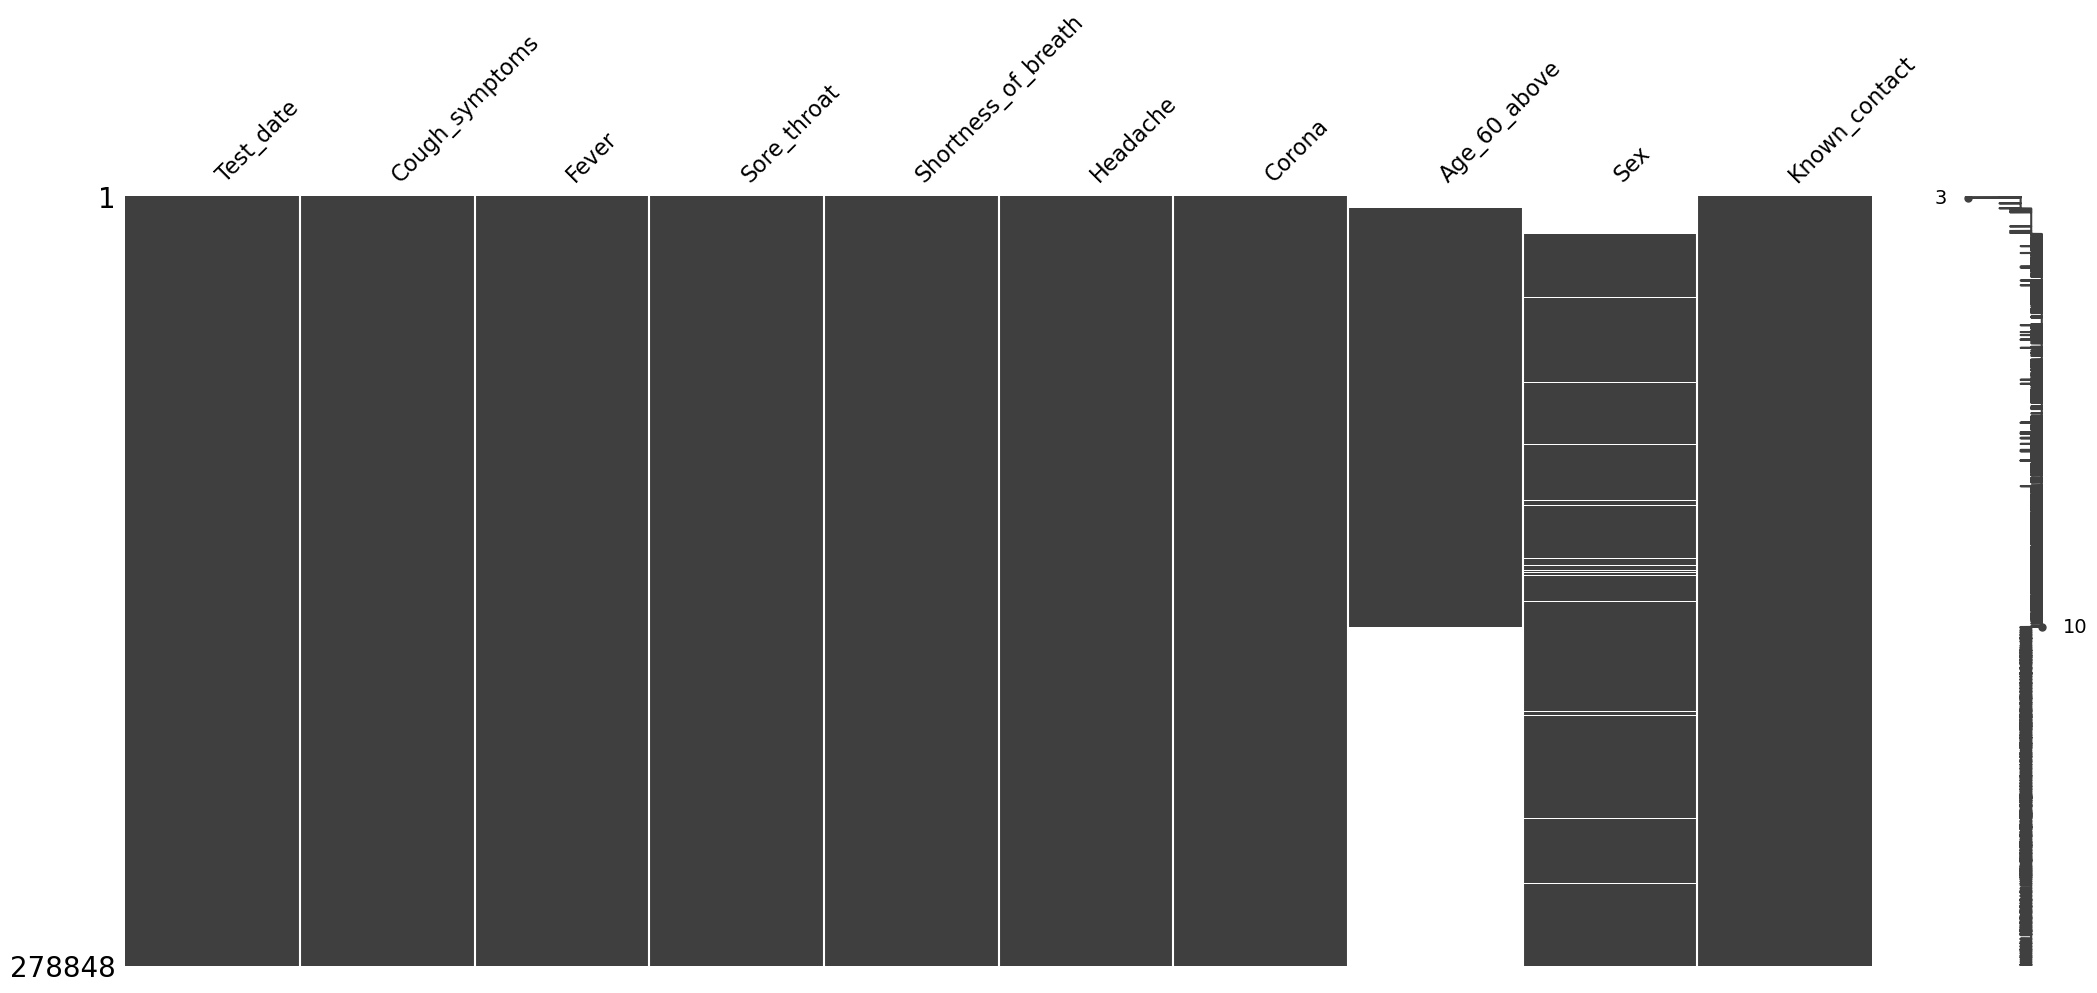

In [186]:
# creating matrix plot to see the pattern in missing values 
msno.matrix(df_covid)

<AxesSubplot:>

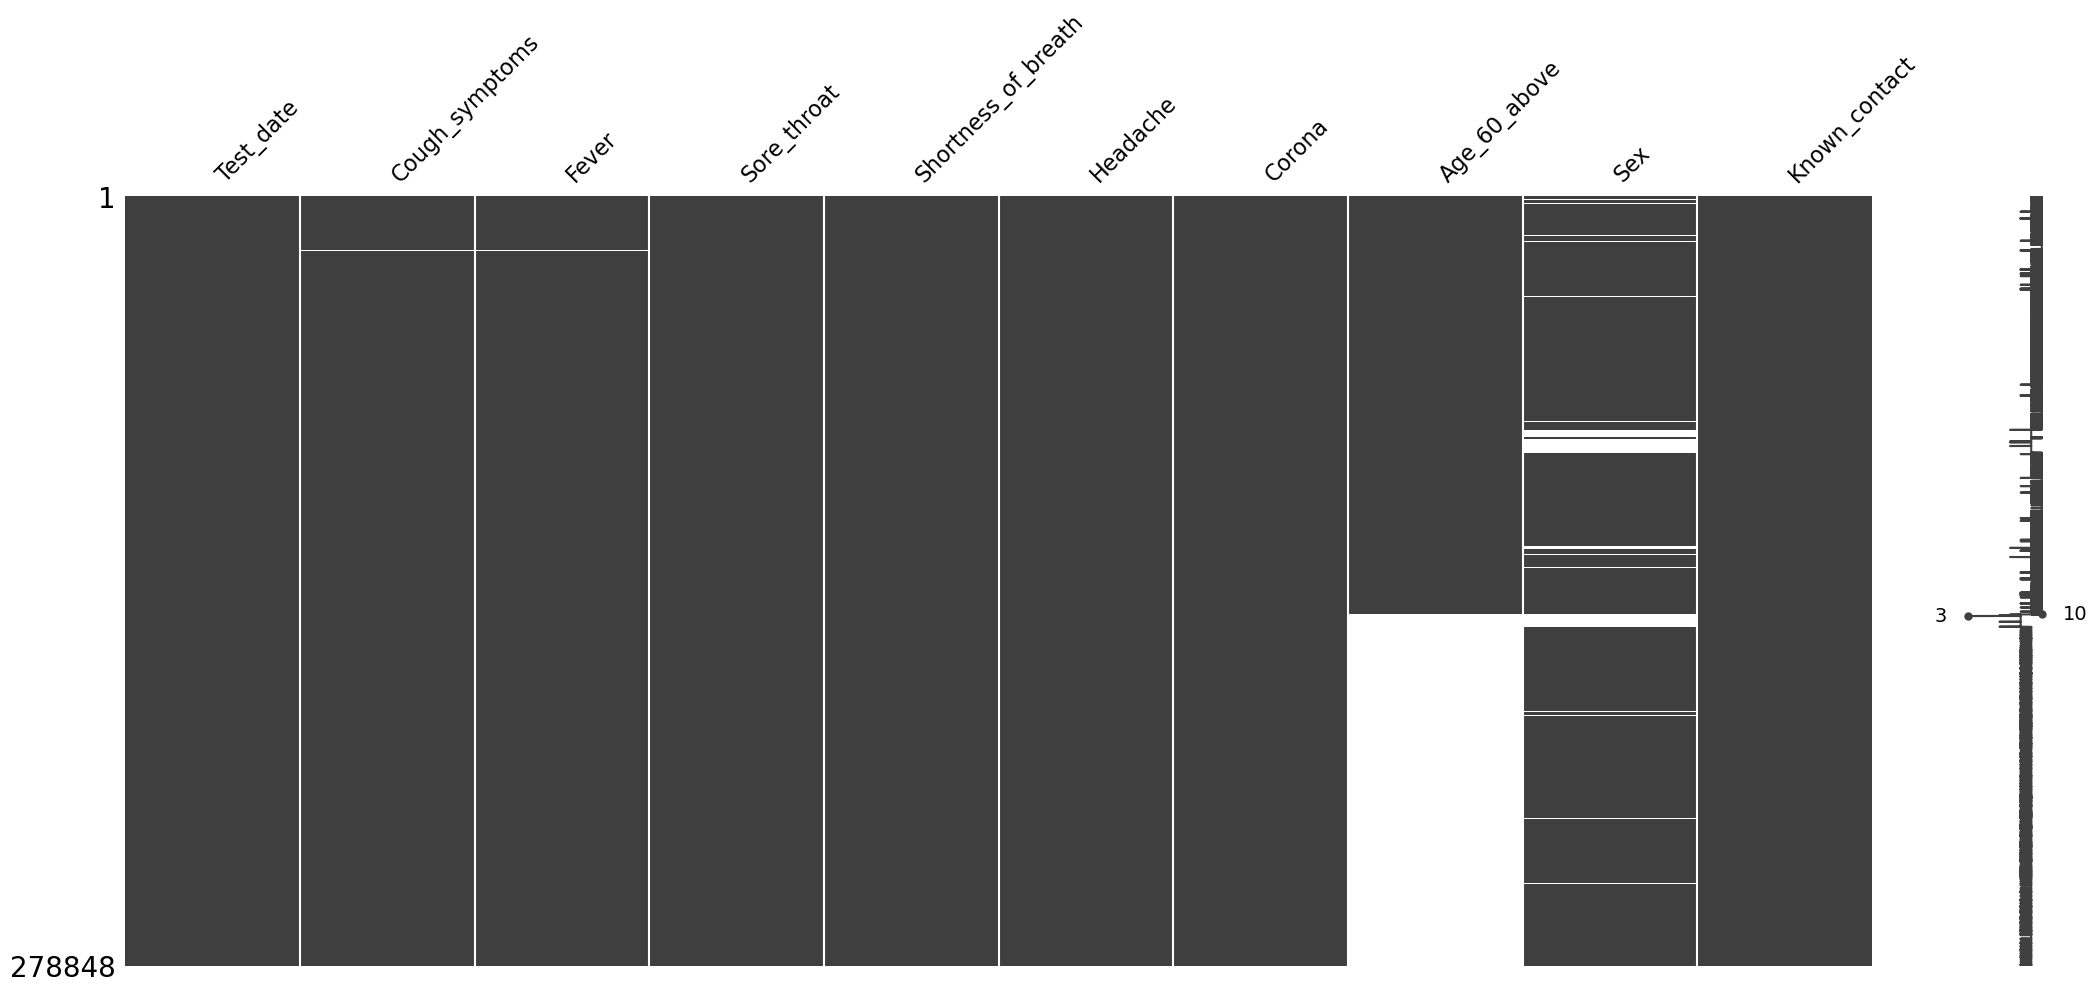

In [187]:
# sorting the values by column 'Age_60_above'
sorted = df_covid.sort_values('Age_60_above')
msno.matrix(sorted)

<AxesSubplot:>

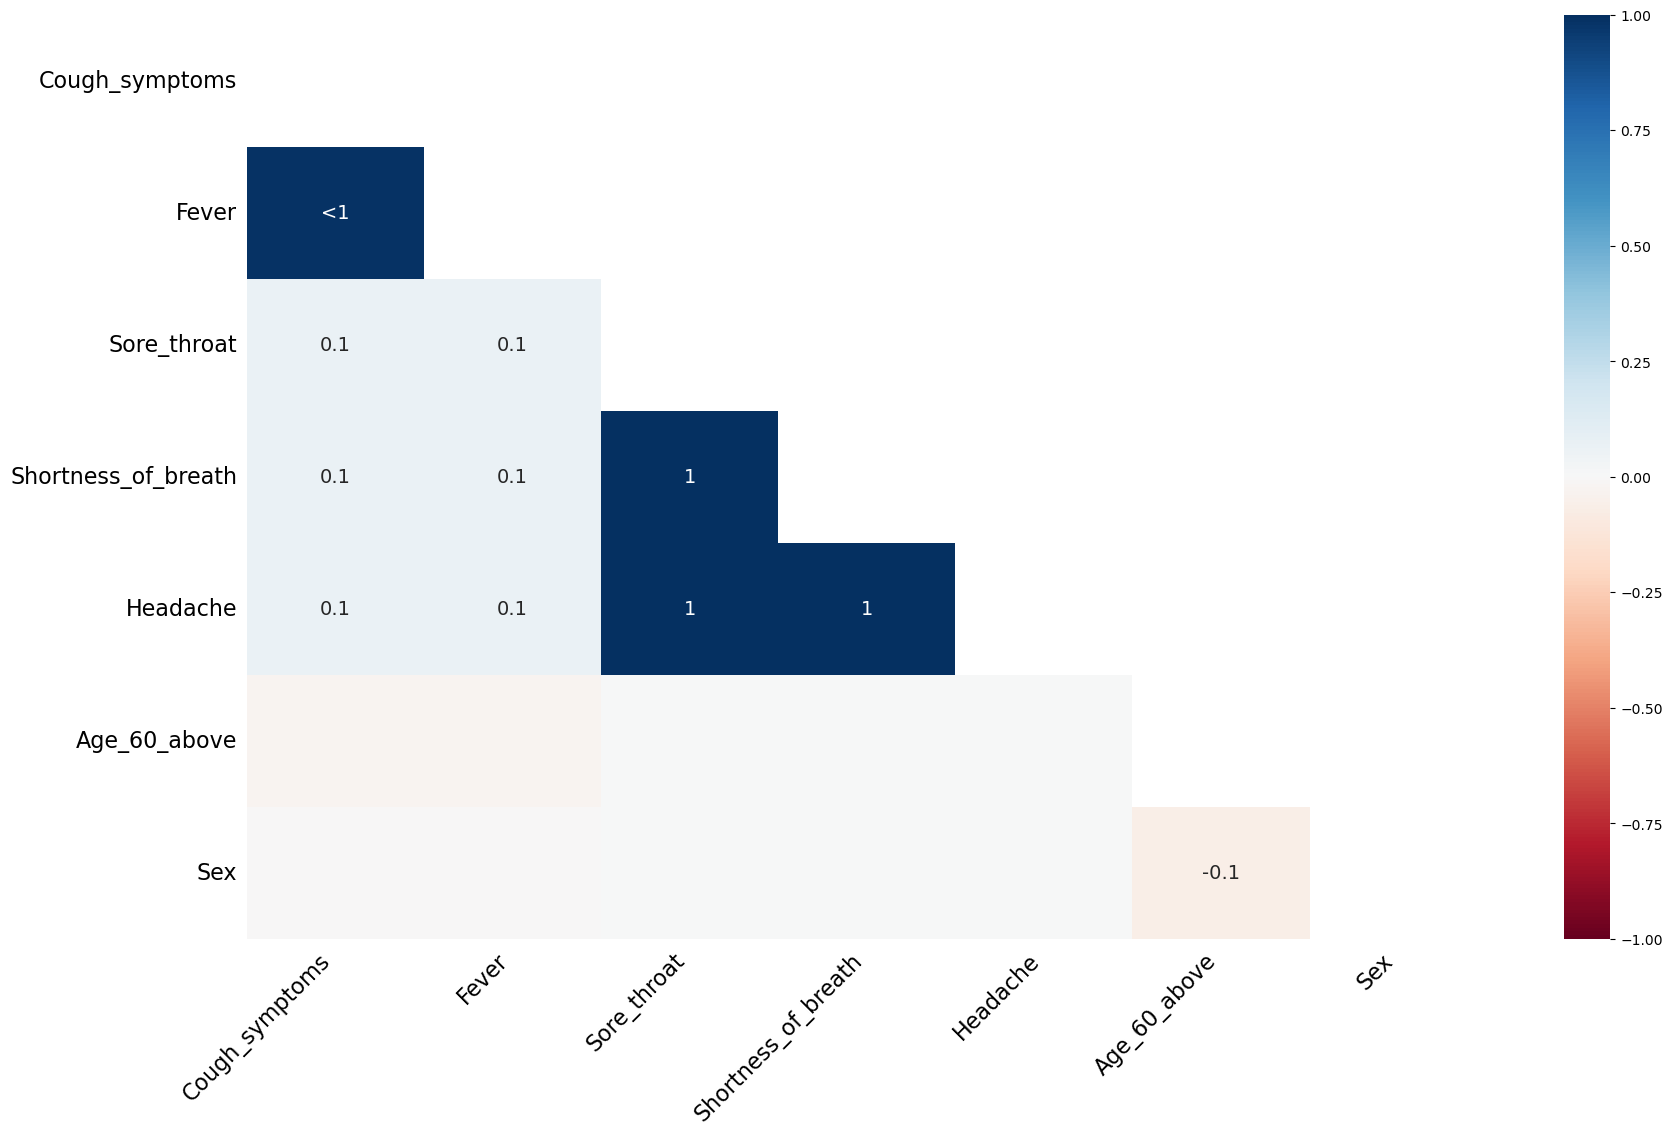

In [188]:
# Checking corelation between missing values using heatmap
msno.heatmap(df_covid)

From the heatmap we can infer that variables like Headache, Sore_throat & Shortness_of_breath have perfect positive correlation between missing values. Similarly Fever & Cough _symptoms have a strong positive correlation between missing values.

### Correcting the repeated values with different spellings

In [189]:
df_covid = df_covid.replace(["TRUE", "FALSE"], [True, False])
df_covid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Ind_ID,,,,,,,,,,
1,2020-11-03,True,False,True,False,False,negative,NaN,NaN,Abroad
2,2020-11-03,False,True,False,False,False,positive,NaN,NaN,Abroad
3,2020-11-03,False,True,False,False,False,positive,NaN,NaN,Abroad
4,2020-11-03,True,False,False,False,False,negative,NaN,NaN,Abroad
5,2020-11-03,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278844,2020-04-30,False,False,False,False,False,positive,NaN,male,Other
278845,2020-04-30,False,False,False,False,False,negative,NaN,female,Other
278846,2020-04-30,False,False,False,False,False,negative,NaN,male,Other


### Using imputation techniques to fill missing values

Mode imputation

In [190]:
df_covid_mode = df_covid.copy(deep=True)  # creating a copy for further evaluation

mode_imputer = SimpleImputer(strategy='most_frequent')
df_covid_mode.iloc[:, :] = mode_imputer.fit_transform(df_covid_mode)

In [191]:
# Get value_counts for each column having 'object' data type
for col in df_covid_mode.describe(include = 'all').columns:
    print(col)
    print(df_covid_mode[col].value_counts())
    print('-'*80)

Test_date
2020-04-20    10921
2020-04-19    10199
2020-04-22     9646
2020-04-21     9624
2020-04-16     9138
2020-04-23     8744
2020-01-04     8654
2020-04-13     8425
2020-02-04     8188
2020-03-04     8079
2020-04-17     7645
2020-05-04     7509
2020-04-30     7313
2020-04-27     7304
2020-04-15     7149
2020-03-31     7134
2020-04-24     7028
2020-03-26     6663
2020-04-14     6571
2020-04-28     6334
2020-04-18     6321
2020-04-26     6131
2020-12-04     5984
2020-03-27     5963
2020-07-04     5931
2020-03-30     5915
2020-10-04     5678
2020-03-28     5602
2020-03-25     5495
2020-06-04     5368
2020-03-29     5277
2020-04-04     5145
2020-04-25     5052
2020-03-24     4735
2020-09-04     4539
2020-11-04     4341
2020-04-29     4259
2020-08-04     4058
2020-03-22     3565
2020-03-23     3494
2020-03-19     2243
2020-03-18     1991
2020-03-20     1870
2020-03-21     1648
2020-03-17     1463
2020-03-16     1304
2020-03-15      985
2020-03-13      686
2020-12-03      634
2020-03-14

In [192]:
df_covid_mode.isnull().sum() # Sum of null values

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [193]:
# shifting the dependent variable to last position
df_covid_mode = df_covid_mode.reindex(columns = [col for col in df_covid_mode.columns if col != 'Corona'] + ['Corona'])
df_covid_mode

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
Ind_ID,,,,,,,,,,
1,2020-11-03,True,False,True,False,False,No,female,Abroad,negative
2,2020-11-03,False,True,False,False,False,No,female,Abroad,positive
3,2020-11-03,False,True,False,False,False,No,female,Abroad,positive
4,2020-11-03,True,False,False,False,False,No,female,Abroad,negative
5,2020-11-03,True,False,False,False,False,No,female,Contact with confirmed,negative
...,...,...,...,...,...,...,...,...,...,...
278844,2020-04-30,False,False,False,False,False,No,male,Other,positive
278845,2020-04-30,False,False,False,False,False,No,female,Other,negative
278846,2020-04-30,False,False,False,False,False,No,male,Other,negative


In [194]:
# Dropping the Test_date column as it is not required

df_covid_mode = df_covid_mode.drop('Test_date', axis=1)
df_covid_mode

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
Ind_ID,,,,,,,,,
1,True,False,True,False,False,No,female,Abroad,negative
2,False,True,False,False,False,No,female,Abroad,positive
3,False,True,False,False,False,No,female,Abroad,positive
4,True,False,False,False,False,No,female,Abroad,negative
5,True,False,False,False,False,No,female,Contact with confirmed,negative
...,...,...,...,...,...,...,...,...,...
278844,False,False,False,False,False,No,male,Other,positive
278845,False,False,False,False,False,No,female,Other,negative
278846,False,False,False,False,False,No,male,Other,negative


### Encoding variables

In [201]:
# Define the columns to convert to binary values
columns_to_convert = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact', 'Corona']

# Convert specified columns to binary values
df_covid_mode[columns_to_convert] = df_covid_mode[columns_to_convert].replace({True: 1, False: 0, 'Yes': 1, 'No': 0, 'male': 1, 'female': 0, 'Abroad': 1, 'Other': 0, 'Contact with confirmed': 2, 'positive': 1, 'negative': 0, 'other': 2})

df_covid_mode.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
Ind_ID,,,,,,,,,
1,1,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,1,1
3,0,1,0,0,0,0,0,1,1
4,1,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,2,0


### Splitting the dataset into the Training set and Test set

In [202]:
# Split the dataset into features and target variable
X = df_covid_mode.drop('Corona', axis=1)
y = df_covid_mode['Corona']

In [204]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

### 1. Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [206]:
# Create an instance of Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [215]:
# Make predictions on the testing data
logistic_reg_pred = logreg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### **Confusion Matrix**

In [216]:
from sklearn.metrics import confusion_matrix

confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[51682,   359,     0],
       [ 1677,  1261,     0],
       [  764,    27,     0]], dtype=int64)

### **Accuracy Score**

In [213]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

# accuracy using accuracy_score
print(round(accuracy_score(y_test, logistic_reg_pred), 2))


0.95


In [218]:
# Assign the values from the confusion matrix
truly_positive = 51682
truly_negative = 1261
falsely_positive = 359 + 1677 + 764
falsely_negative = 27

# Calculate the accuracy manually
accuracy_manual = round(((truly_positive + truly_negative) / (truly_positive + falsely_positive + falsely_negative + truly_negative)), 4)

print("Accuracy of our model is {}".format(accuracy_manual))

Accuracy of our model is 0.9493


### **Precision Score**

In [219]:
precision_manual_covid=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual_covid))

Precision of our model is 0.9486


### Recall Score

In [221]:
recall_manual_covid=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual_covid))

Recall of our model is 0.9995


### **F-1 Score**

In [222]:
f1_score=2*(precision_manual_covid*recall_manual_covid)/(precision_manual_covid+recall_manual_covid)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.9734 


### Area under curve (AUC)

In [238]:
from sklearn import metrics
# Step 1: Obtain predicted probabilities
probabilities = logistic_reg.predict_proba(X_test)

# Step 2: Calculate the multiclass ROC AUC
auc = roc_auc_score(y_test, probabilities, multi_class='ovr')

print("Multiclass ROC AUC: {:.4f}".format(auc))

AttributeError: 'LogisticRegression' object has no attribute 'classes_'

In [239]:
metrics.plot_roc_curve(logistic_reg, X_test, logistic_reg_pred)
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'classes_'

In [240]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

ValueError: multiclass format is not supported

### **2. K-Nearest Neighbor(KNN) Algorithm**

In [249]:
from sklearn.neighbors import KNeighborsClassifier  

classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [250]:
#Predicting the test set result  
y_pred= classifier.predict(X_test) 

In [251]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [252]:
# Creating confusion matrix, accuracy score, etc
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[51410   631     0]
 [ 1488  1450     0]
 [  760    31     0]]
0.9478214093598709


### **K fold cross validation**

In [253]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [254]:
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsClassifier()
acc_score = []

In [257]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

KeyError: '[0] not in index'

### **3. Support Vector Machine(SVM)**

In [258]:
#Importing SVM model
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [259]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[52041,     0,     0],
       [ 2938,     0,     0],
       [  791,     0,     0]], dtype=int64)

In [260]:
# print prediction results
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     52041
           1       0.00      0.00      0.00      2938
           2       0.00      0.00      0.00       791

    accuracy                           0.93     55770
   macro avg       0.31      0.33      0.32     55770
weighted avg       0.87      0.93      0.90     55770



### **Hyperparameter tuning using gridsearch**

In [261]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time= 4.9min
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time= 4.9min
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time= 5.4min
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time= 5.9min
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time= 6.6min
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time= 5.6min
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time= 5.2min
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time= 4.9min
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time= 5.1min
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time= 5.0min
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.933 total time= 5.0min
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

KeyboardInterrupt: 

In [262]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [263]:
#Create a svm Classifier
clf = svm.SVC(C= 100, gamma = 1, kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [264]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [265]:
cm= confusion_matrix(y_test, grid_predictions) 
cm

NameError: name 'grid_predictions' is not defined

In [266]:
# print prediction results

print(classification_report(y_test, grid_predictions))

NameError: name 'grid_predictions' is not defined

### 3. Decision Tree

In [267]:
# Load libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation

In [268]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [269]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9333 
Decision tree testing set accuracy: 0.9329 


In [270]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     52041
           1       0.00      0.00      0.00      2938
           2       0.00      0.00      0.00       791

    accuracy                           0.93     55770
   macro avg       0.31      0.33      0.32     55770
weighted avg       0.87      0.93      0.90     55770



In [271]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [272]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9332 
Decision tree testing set accuracy: 0.9331 


In [273]:
# Model Accuracy, classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     52041
           1       0.00      0.00      0.00      2938
           2       0.00      0.00      0.00       791

    accuracy                           0.93     55770
   macro avg       0.31      0.33      0.32     55770
weighted avg       0.87      0.93      0.90     55770



### 4. Extreme Gradient Boosting

In [274]:
pip install xgboost

In [278]:
import seaborn as snp
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [284]:
# # we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [285]:
#We have to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 10)

In [286]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)


[21:03:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [287]:
# we have to #Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 0.352305


In [288]:
#Invoking XGBoost's cv() method and store the results in a cv_results DataFrame
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
'max_depth': 5, 'alpha': 10}

In [289]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[21:03:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:03:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [290]:
# We have to Extract and print the final boosting round metric.
print((cv_results["test-rmse-mean"]).tail(1))

49    0.284606
Name: test-rmse-mean, dtype: float64


In [292]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


[21:03:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

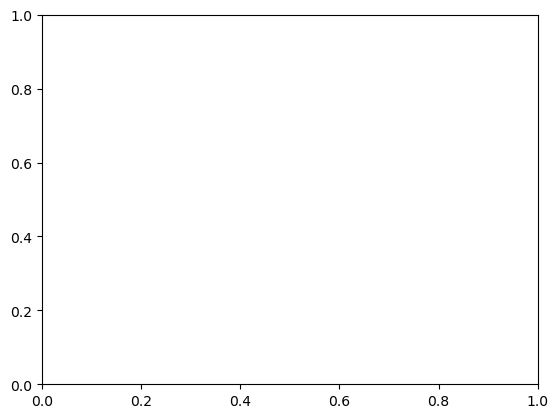

In [293]:
#visualizing individual trees from the fully boosted model
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [1000, 100]
plt.show()


### 5. Random Forest Classifier

In [295]:
from sklearn.ensemble import RandomForestClassifier

In [296]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [297]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [298]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9329209252286176


In [299]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[52029     7     5]
 [ 2938     0     0]
 [  791     0     0]]


As we can see in the above matrix, total incorrect results = 7 + 5 + 2938 + 791 = 3741 and Total correct predictions = 52029 + 0 + 0 = 52029

### Visualizing the training Set result

In [306]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


x_set, y_set = X_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Random Forest Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
Visualizing the test set result

In [307]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  

x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Random Forest Algorithm(Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

NameError: name 'x_test' is not defined

The above image is the visualization result for the test set. We can check that there is a minimum number of incorrect predictions 3741 without the Overfitting issue. We will get different results by changing the number of trees in the classifier.

### Conclusion:

## THANK YOU